In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
strava_df = pd.read_csv('sf_edges_2017_sample_metro_edges_data.csv')
strava_df.head()

edge_id  year  day  hour  minute  athlete_count  rev_athlete_count  \
0   838170  2016  206    18      20              1                  0   
1   838171  2016  206    18      20              1                  0   
2   838185  2016  200    19      41              1                  0   
3   838186  2016  200    19      41              1                  0   
4   838190  2016  201    15      27              0                  1   

   activity_count  rev_activity_count  total_activity_count  activity_time  \
0               1                   0                     1       1.601218   
1               1                   0                     1       1.885568   
2               1                   0                     1       2.427910   
3               1                   0                     1       2.672757   
4               0                   1                     1            NaN   

   rev_activity_time  commute_count  
0                NaN              0  
1                NaN              0  
2                NaN              0  
3                NaN              0  
4           6.225861              0

In [15]:
# strava_df[strava_df[(strava_df.day==206) & (strava_df.hour==18) & (strava_df.minute==2)]
# strava_df[(strava_df.total_activity_count > 10) & (strava_df.edge_id == 133204)]
strava_df.describe()

edge_id       year           day          hour        minute  \
count  2.064568e+06  2064568.0  2.064568e+06  2.064568e+06  2.064568e+06   
mean   8.869828e+05     2016.0  2.030984e+02  1.266144e+01  2.959359e+01   
std    3.038814e+05        0.0  2.132719e+00  4.551325e+00  1.725589e+01   
min    3.997700e+04     2016.0  1.990000e+02  0.000000e+00  0.000000e+00   
25%    6.876640e+05     2016.0  2.010000e+02  8.000000e+00  1.500000e+01   
50%    9.255760e+05     2016.0  2.030000e+02  1.200000e+01  3.000000e+01   
75%    1.173644e+06     2016.0  2.050000e+02  1.700000e+01  4.500000e+01   
max    1.269222e+06     2016.0  2.690000e+02  2.300000e+01  5.900000e+01   

       athlete_count  rev_athlete_count  activity_count  rev_activity_count  \
count   2.064568e+06       2.064568e+06    2.064568e+06        2.064568e+06   
mean    6.994025e-01       4.870515e-01    6.994025e-01        4.870515e-01   
std     6.586926e-01       6.337435e-01    6.586926e-01        6.337435e-01   
min     0.000000e+00       0.000000e+00    0.000000e+00        0.000000e+00   
25%     0.000000e+00       0.000000e+00    0.000000e+00        0.000000e+00   
50%     1.000000e+00       0.000000e+00    1.000000e+00        0.000000e+00   
75%     1.000000e+00       1.000000e+00    1.000000e+00        1.000000e+00   
max     1.900000e+01       2.000000e+01    1.900000e+01        2.000000e+01   

       total_activity_count  activity_time  rev_activity_time  commute_count  
count          2.064568e+06   1.274448e+06      891148.000000   2.064568e+06  
mean           1.186454e+00   1.553809e+01          16.390202   5.962783e-01  
std            5.564067e-01   9.063510e+01          61.992886   6.383571e-01  
min            1.000000e+00   0.000000e+00           0.000000   0.000000e+00  
25%            1.000000e+00   2.845238e+00           2.631696   0.000000e+00  
50%            1.000000e+00   7.337997e+00           7.084904   1.000000e+00  
75%            1.000000e+00   1.677055e+01          17.474381   1.000000e+00  
max            2.800000e+01   7.558560e+04       11804.486908   1.400000e+01

In [42]:
daily_counts = strava_df.groupby(['edge_id','day'])[['total_activity_count','commute_count']].sum()
daily_counts.query('day == 200')

total_activity_count  commute_count
edge_id day                                     
39977   200                     3              3
        201                     3              3
        202                     4              2
        203                    10              7
        204                     6              5
        205                     2              1
        206                     3              1
39978   200                     3              3
        201                     3              3
        202                     3              2
        203                     6              5
        204                     4              4
        206                     1              1
39979   200                     2              2
        201                     1              1
        202                     5              5
        203                     5              4
        204                     2              2
39980   200                     3              3
        201                     2              2

In [63]:
d206 = strava_df.query('day == 206')
d206.sort_values(by=['edge_id','hour','minute'],inplace=True)
d206

/Users/peter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


edge_id  year  day  hour  minute  athlete_count  rev_athlete_count  \
51      39977  2016  206    10      23              0                  1   
50      39977  2016  206    10      27              0                  1   
52      39977  2016  206    12      15              0                  1   
174     39978  2016  206    10      27              1                  0   
212    133050  2016  206    11      29              0                  1   
...       ...   ...  ...   ...     ...            ...                ...   
2720  1269222  2016  206    13      35              1                  0   
2716  1269222  2016  206    14      39              1                  0   
2717  1269222  2016  206    16      28              0                  1   
2718  1269222  2016  206    16      49              1                  0   
2719  1269222  2016  206    18      19              1                  0   

      activity_count  rev_activity_count  total_activity_count  activity_time  \
51                 0                   1                     1            NaN   
50                 0                   1                     1            NaN   
52                 0                   1                     1            NaN   
174                1                   0                     1      49.690212   
212                0                   1                     1            NaN   
...              ...                 ...                   ...            ...   
2720               1                   0                     1       1.036074   
2716               1                   0                     1       0.706911   
2717               0                   1                     1            NaN   
2718               1                   0                     1       1.831619   
2719               1                   0                     1       1.201707   

      rev_activity_time  commute_count  
51            22.307590              0  
50            21.942059              1  
52            19.274315              0  
174                 NaN              1  
212           27.044574              0  
...                 ...            ...  
2720                NaN              1  
2716                NaN              0  
2717           1.412915              0  
2718                NaN              0  
2719                NaN              1  

[306122 rows x 13 columns]

In [69]:
d206.groupby(by=['edge_id'])['total_activity_count'].count().sort_values(ascending=False)

edge_id
828869     391
1125374    382
1125372    380
828868     342
1174071    315
          ... 
1116374      1
1116373      1
1116362      1
1116259      1
912575       1
Name: total_activity_count, Length: 21119, dtype: int64

In [80]:
POI_1 = strava_df[strava_df.edge_id == 828869]
POI_1.sort_values(by=['hour','minute'],inplace=True)
POI_1['min_from_0'] = POI_1.day*24*60+POI_1.hour*60+POI_1.minute
POI_1.head(30)

/Users/peter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


edge_id  year  day  hour  minute  athlete_count  rev_athlete_count  \
1455318   828869  2016  204     1       2              1                  0   
1454140   828869  2016  202     1      32              1                  0   
1453017   828869  2016  201     5      43              1                  0   
1455325   828869  2016  205     6       0              2                  0   
1455319   828869  2016  205     6       3              1                  0   
1455334   828869  2016  205     6       8              0                  1   
1455322   828869  2016  205     6       9              1                  0   
1455326   828869  2016  205     6      14              1                  0   
1456345   828869  2016  206     6      18              0                  1   
1453013   828869  2016  201     6      23              1                  0   
1455323   828869  2016  205     6      25              1                  0   
1455320   828869  2016  205     6      26              1                  0   
1456348   828869  2016  206     6      29              1                  1   
1455328   828869  2016  205     6      31              3                  0   
1454853   828869  2016  204     6      39              1                  0   
1455324   828869  2016  205     6      40              3                  3   
1455332   828869  2016  205     6      41              1                  0   
1453577   828869  2016  202     6      43              1                  0   
1455331   828869  2016  205     6      43              4                  0   
1447314   828869  2016  200     6      45              1                  0   
1456347   828869  2016  206     6      45              1                  0   
1455329   828869  2016  205     6      46              1                  0   
1456342   828869  2016  206     6      49              1                  1   
1455330   828869  2016  205     6      50              2                  0   
1455333   828869  2016  205     6      51              3                  0   
1456346   828869  2016  206     6      52              1                  0   
1456343   828869  2016  206     6      53              0                  1   
1456344   828869  2016  206     6      54              0                  2   
1456349   828869  2016  206     6      55              3                  0   
1455321   828869  2016  205     6      57              1                  0   

         activity_count  rev_activity_count  total_activity_count  \
1455318               1                   0                     1   
1454140               1                   0                     1   
1453017               1                   0                     1   
1455325               2                   0                     2   
1455319               1                   0                     1   
1455334               0                   1                     1   
1455322               1                   0                     1   
1455326               1                   0                     1   
1456345               0                   1                     1   
1453013               1                   0                     1   
1455323               1                   0                     1   
1455320               1                   0                     1   
1456348               1                   1                     2   
1455328               3                   0                     3   
1454853               1                   0                     1   
1455324               3                   3                     6   
1455332               1                   0                     1   
1453577               1                   0                     1   
1455331               4                   0                     4   
1447314               1                   0                     1   
1456347               1                   0                     1   
1455329               1                  

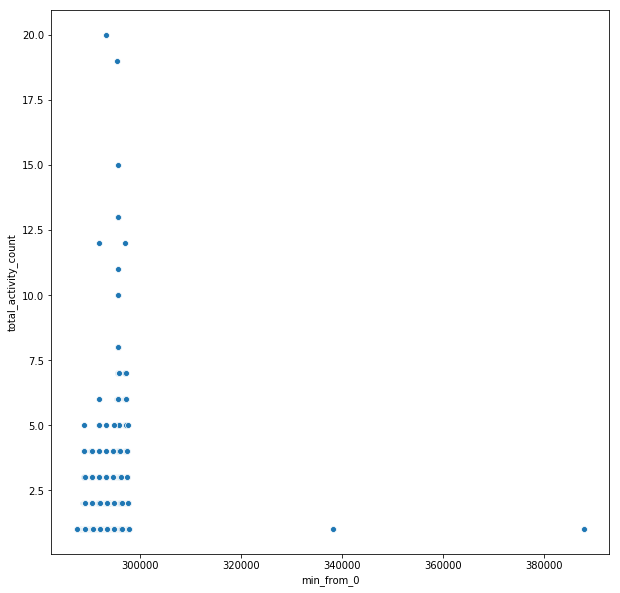

In [82]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x = 'min_from_0',y = 'total_activity_count',data = POI_1)